## 3. Calidad de un vino

In [207]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.losses import sparse_categorical_crossentropy
from keras.utils.np_utils import to_categorical

### (a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

In [231]:
df_red = pd.read_csv("dataset3/winequality-red.csv",sep=";")
df_red['type'] = 0
df_white = pd.read_csv("dataset3/winequality-white.csv",sep=";")
df_white['type'] = 1
df = pd.concat([df_red,df_white], axis=0)
df.info()
pd.value_counts(df['quality'].values, sort=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


4     216
8     193
5    2138
9       5
6    2836
3      30
7    1079
dtype: int64

#### Observación
Se agragó la columna "type" donde 0 es tinto y 1 es blanco. Se observa que el dataset no contiene valores de calidad menores que 3 y que la mayoría se ubica entre 5 y 7. Además existe una gran diferencia entre una categoría y otra, pudiendo afectar el proceso de aprendizaje.

### (b) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de buena calidad o no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas (25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.

0    2384
1    4113
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
type                    6497 non-null int64
good_quality            6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 870.6 KB
None


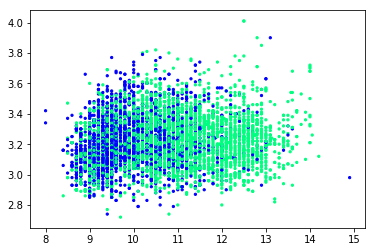

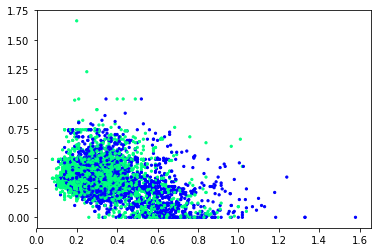

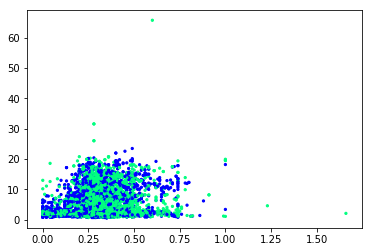

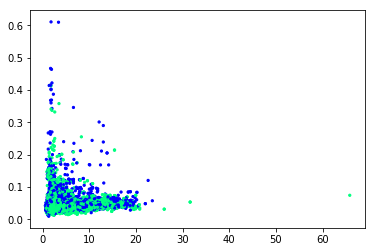

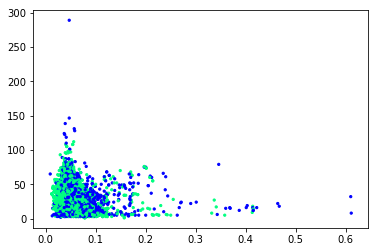

In [235]:
#Create sets
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]
df_no_quality = df.drop('quality',1)
print(pd.value_counts(df_no_quality['good_quality'].values, sort=False))
print(df_no_quality.info())
y = df_no_quality.pop('good_quality')
X = df_no_quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Plot ph vs alcohol
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train,y_test),axis=0)
plt.scatter(X[:,10], X[:,8], s=5, c=y, cmap=plt.cm.winter)
plt.show()

#Plot ph vs alcohol
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train,y_test),axis=0)
plt.scatter(X[:,1], X[:,2], s=5, c=y, cmap=plt.cm.winter)
plt.show()

#Plot ph vs alcohol
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train,y_test),axis=0)
plt.scatter(X[:,2], X[:,3], s=5, c=y, cmap=plt.cm.winter)
plt.show()

#Plot ph vs alcohol
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train,y_test),axis=0)
plt.scatter(X[:,3], X[:,4], s=5, c=y, cmap=plt.cm.winter)
plt.show()

#Plot ph vs alcohol
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train,y_test),axis=0)
plt.scatter(X[:,4], X[:,5], s=5, c=y, cmap=plt.cm.winter)
plt.show()

#### Observación
Cabe destacar la diferencia existente entre la categoría "buena calidad", 1, y mala calidad, 0. Lo cual puede afectar posteriormente la calidad de la máquina. Se investigaron los atributos del vino aprendiendo que gran parte de la calidad depende del ph y de la cantidad de alcohol. A modo de análisis previo y comprobación de esto, se graficó la dependencia del ph con el nivel de alcohol, dando cuenta que este par de atributos separa de mejor forma las clases. Esto podría se útil más adelante.

### (c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los hiper-parámetros que prefiera. Recuerde que las decisiones no pueden ser basadas mirando el conjunto de pruebas, debido al desbalanceo que se produce en las dos clases mida la métrica F1-score [5] sobre el conjunto de entrenamiento y de pruebas.

In [173]:
# Función que escoge parámetros óptimos

#rs=20
#md=20
#mss=20
#df1=0
#
#for i in range(1, rs):
#    for j in range(1, md):
#        for k in range(2, mss):
#            tree_c = Tree(criterion = "entropy", random_state = i, max_depth=j, min_samples_split=k)
#            tree_c.fit(X_train, y_train)
#            f1 = f1_score(y_train, tree_c.predict(X_train))
#            if (f1>df1):
#                df1 = f1
#                print("Entropy %d %d %d %f" % (i, j, k, df1))
#            tree_c = Tree(criterion = "gini", random_state = i, max_depth=j, min_samples_split=k)
#            tree_c.fit(X_train, y_train)
#            f1 = f1_score(y_train, tree_c.predict(X_train))
#            if (f1>df1):
#                df1 = f1
#                print("Gini %d %d %d %f" % (i, j, k, df1))

In [174]:
tree_c = Tree(criterion = "entropy", random_state = 9, max_depth=18, min_samples_split=2)
tree_c.fit(X_train, y_train)
print(classification_report(y_train, tree_c.predict(X_train)))

tree_c = Tree(criterion = "entropy", random_state = 9, max_depth=18, min_samples_split=2)
tree_c.fit(X_train, y_train)
print(classification_report(y_test, tree_c.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1800
          1       1.00      0.99      1.00      3072

avg / total       0.99      0.99      0.99      4872

             precision    recall  f1-score   support

          0       0.68      0.68      0.68       584
          1       0.82      0.82      0.82      1041

avg / total       0.77      0.77      0.77      1625



#### Respuesta

Se realizó una función que escogió los mejores parámetros basado en el f1Score del conjunto de entrenamiento. A partir de el se llegó a que la profundidad debía ser 18 y que el número mínimo de elementos por corte debía ser 2. Una vez hecho esto, se obtuvo un reporte de clasificación para el conjunto de entrenamiento y el de pruebas.

Se observa que dada la cantidad menor de ejemplos para la clase 0 (baja calidad), su f1Score es menor, mientras que para la clase 1 (alta calidad) esta estadística es mejor. Esto se debe a que hay una mayor cantidad de ejemplos en ese caso.

Se hace patente una gran diferencia entre el conjunto de training y test, dando a entender la existencia de overfitting.

### (d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [175]:
# Función que escoge parámetros óptimos

#score = 0
#for rs in range(1,20):
#    for md in range(1,20):
#        for ne in range(1,100):
#            model = RandomForestClassifier(n_estimators=ne, random_state=rs, max_depth=md, n_jobs=-1)
#            model.fit(X_train, y_train)
#            s = f1_score(y_train, model.predict(X_train))
#            if (s>score):
#                score = s
#                print("RF %d %d %d %f" % (rs, md, ne, score))

In [191]:
scoreTrain = []
scoreTest = []
for ne in range(1,100):
    model = RandomForestClassifier(n_estimators=ne, random_state=18, max_depth=20, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, md, sTrain))

RF 1 20 0.916070
RF 2 20 0.918367
RF 3 20 0.963444
RF 4 20 0.966329
RF 5 20 0.978751
RF 6 20 0.981627
RF 7 20 0.987971
RF 8 20 0.987739
RF 9 20 0.990894
RF 10 20 0.991202
RF 11 20 0.992208
RF 12 20 0.993651
RF 13 20 0.994967
RF 14 20 0.996257
RF 15 20 0.996749
RF 16 20 0.996583
RF 17 20 0.996587
RF 18 20 0.997722
RF 19 20 0.997398
RF 20 20 0.998372
RF 21 20 0.998048
RF 22 20 0.998698
RF 23 20 0.998699
RF 24 20 0.999024
RF 25 20 0.999186
RF 26 20 0.999186
RF 27 20 0.999349
RF 28 20 0.999512
RF 29 20 0.999349
RF 30 20 0.999674
RF 31 20 0.999674
RF 32 20 0.999674
RF 33 20 0.999512
RF 34 20 0.999674
RF 35 20 0.999674
RF 36 20 0.999674
RF 37 20 0.999674
RF 38 20 0.999674
RF 39 20 0.999674
RF 40 20 0.999837
RF 41 20 0.999674
RF 42 20 0.999837
RF 43 20 0.999837
RF 44 20 0.999674
RF 45 20 0.999837
RF 46 20 0.999837
RF 47 20 0.999674
RF 48 20 0.999674
RF 49 20 0.999674
RF 50 20 0.999837
RF 51 20 1.000000
RF 52 20 1.000000
RF 53 20 1.000000
RF 54 20 1.000000
RF 55 20 1.000000
RF 56 20 1.000000
R

In [ ]:
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,100)), np.array(scoreTrain), lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(np.array(range(1,100)), np.array(scoreTest), lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()
model = RandomForestClassifier(n_estimators=ne, random_state=18, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

#### Respuesta

Se realizó una función que escogió los mejores parámetros basado en el f1Score del conjunto de entrenamiento. Dados estos parámetros, max_depth = 70, se realizo una ejecucion del modelo variando el número de estimadores.

Se observa un crecimiento sostenible del f1Score en el conjunto de entrenamiento. Esto ocurre de la misma forma en el conjunto de pruebas, con una variación mayor y con un valor menor que en el de entrenamiento. 

Así, se observa que existe overfitting. A través de classification_score, se observa la diferencia entre f1Score de la clase positiva y negativa, donde se mantiene la tendencia de diferencia en la eficiencia entre estas clases por la cantidad distinta de ejemplos disponibles

### (e) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de AdaBoost. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

AB 1 0.999837
AB 2 1.000000
AB 3 1.000000
AB 4 1.000000
AB 5 1.000000
AB 6 1.000000
AB 7 1.000000
AB 8 1.000000
AB 9 1.000000
AB 10 1.000000
AB 11 1.000000
AB 12 1.000000
AB 13 1.000000
AB 14 1.000000
AB 15 1.000000
AB 16 1.000000
AB 17 1.000000
AB 18 1.000000
AB 19 1.000000
AB 20 1.000000
AB 21 1.000000
AB 22 1.000000
AB 23 1.000000
AB 24 1.000000
AB 25 1.000000
AB 26 1.000000
AB 27 1.000000
AB 28 1.000000
AB 29 1.000000
AB 30 1.000000
AB 31 1.000000
AB 32 1.000000
AB 33 1.000000
AB 34 1.000000
AB 35 1.000000
AB 36 1.000000
AB 37 1.000000
AB 38 1.000000
AB 39 1.000000
AB 40 1.000000
AB 41 1.000000
AB 42 1.000000
AB 43 1.000000
AB 44 1.000000
AB 45 1.000000
AB 46 1.000000
AB 47 1.000000
AB 48 1.000000
AB 49 1.000000


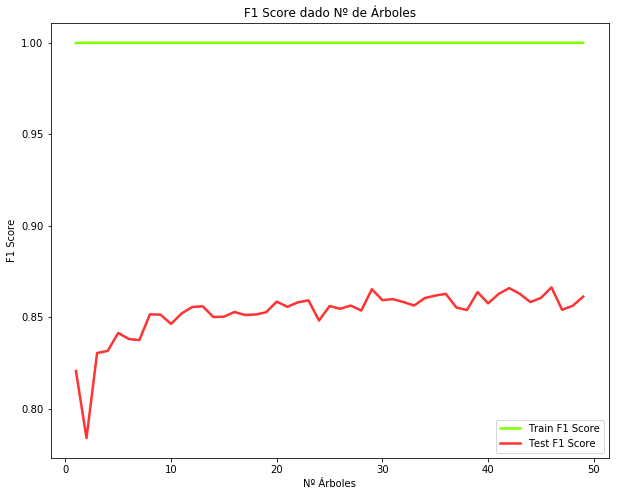

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1800
          1       1.00      1.00      1.00      3072

avg / total       1.00      1.00      1.00      4872

             precision    recall  f1-score   support

          0       0.69      0.65      0.67       584
          1       0.81      0.83      0.82      1041

avg / total       0.77      0.77      0.77      1625



In [273]:
scoreTrain = []
scoreTest = []
for ne in range(1,50):
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=20), n_estimators=ne)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("AB %d %f" % (ne, sTrain))

plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,50)), np.array(scoreTrain), lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(np.array(range(1,50)), np.array(scoreTest), lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()

model = AdaBoostClassifier(base_estimator=Tree(max_depth=6), n_estimators=30)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

#### Respuesta

En esta ocasión se mantiene la misma tendencia que en d, sin embargo se noto una diferencia en el valor f1Score logrado, el cual disminuyó respecto al método anterior. Esto significa que usado adaboost el resultado empeoró.

Esto es contraintuitivo, ya que considerando que AdaBoost busca complementar las máquinas que lo conforman. Sin embargo, invesigando la implementación del algoritmo, AdaBoostClassifier implementa AdaBoost-SAMME, el cual le da mas peso a los puntos mal clasificados. De esta forma, lo que puede estar ocurriendo es que los outlierst estan siendo sobre representados.

Desde otro punto de vista, se observa que la variación respecto al número de estimadores también es diferente. Aquí el crecimiento es más errático, mientras que usando RandomForest este es más continuo. Esto se manifiesta de forma notoria en el conjunto de pruebas, dando a entender que RandomForest puede ser más confiable que AdaBoost en este caso.

### (f) Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos anteriores. Compare y analice estas 4 maneras de resolver el problema definido en b).

In [227]:
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='elu'))
model.add(Dense(256, kernel_initializer='uniform', activation='relu'))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.values, to_categorical(y_train), epochs=100, batch_size=128, verbose=1,
         validation_data=(X_test.values,to_categorical(y_test)))


Train on 4872 samples, validate on 1625 samples
Epoch 1/100
4872/4872 [==============================] - 1s - loss: 0.6660 - acc: 0.6221 - val_loss: 0.6417 - val_acc: 0.6431
Epoch 2/100
4872/4872 [==============================] - 0s - loss: 0.6381 - acc: 0.6340 - val_loss: 0.6373 - val_acc: 0.6246
Epoch 3/100
4872/4872 [==============================] - 0s - loss: 0.6327 - acc: 0.6373 - val_loss: 0.6272 - val_acc: 0.6388
Epoch 4/100
4872/4872 [==============================] - 0s - loss: 0.6018 - acc: 0.6515 - val_loss: 0.6027 - val_acc: 0.6560
Epoch 5/100
4872/4872 [==============================] - 0s - loss: 0.5719 - acc: 0.6847 - val_loss: 0.6265 - val_acc: 0.6295
Epoch 6/100
4872/4872 [==============================] - 0s - loss: 0.5718 - acc: 0.6831 - val_loss: 0.6529 - val_acc: 0.6683
Epoch 7/100
4872/4872 [==============================] - 0s - loss: 0.5686 - acc: 0.6921 - val_loss: 0.5504 - val_acc: 0.6991
Epoch 8/100
4872/4872 [==============================] - 0s - loss: 0.

4872/4872 [==============================] - 0s - loss: 0.4918 - acc: 0.7516 - val_loss: 0.5669 - val_acc: 0.6985
Epoch 65/100
4872/4872 [==============================] - 0s - loss: 0.5140 - acc: 0.7297 - val_loss: 0.5085 - val_acc: 0.7280
Epoch 66/100
4872/4872 [==============================] - 0s - loss: 0.4925 - acc: 0.7508 - val_loss: 0.5093 - val_acc: 0.7366
Epoch 67/100
4872/4872 [==============================] - 0s - loss: 0.5041 - acc: 0.7397 - val_loss: 0.5054 - val_acc: 0.7434
Epoch 68/100
4872/4872 [==============================] - 0s - loss: 0.4920 - acc: 0.7445 - val_loss: 0.5464 - val_acc: 0.7212
Epoch 69/100
4872/4872 [==============================] - 0s - loss: 0.4968 - acc: 0.7432 - val_loss: 0.5775 - val_acc: 0.7071
Epoch 70/100
4872/4872 [==============================] - 0s - loss: 0.5228 - acc: 0.7317 - val_loss: 0.5076 - val_acc: 0.7434
Epoch 71/100
4872/4872 [==============================] - 0s - loss: 0.5002 - acc: 0.7393 - val_loss: 0.5192 - val_acc: 0.74

In [228]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='elu'))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.values, to_categorical(y_train), epochs=100, batch_size=128, verbose=1,
         validation_data=(X_test.values,to_categorical(y_test)))


Train on 4872 samples, validate on 1625 samples
Epoch 1/100
4872/4872 [==============================] - 0s - loss: 0.6572 - acc: 0.6287 - val_loss: 0.6739 - val_acc: 0.6412
Epoch 2/100
4872/4872 [==============================] - 0s - loss: 0.6416 - acc: 0.6346 - val_loss: 0.6312 - val_acc: 0.6338
Epoch 3/100
4872/4872 [==============================] - 0s - loss: 0.6280 - acc: 0.6443 - val_loss: 0.6508 - val_acc: 0.6412
Epoch 4/100
4872/4872 [==============================] - 0s - loss: 0.6271 - acc: 0.6414 - val_loss: 0.6077 - val_acc: 0.6474
Epoch 5/100
4872/4872 [==============================] - 0s - loss: 0.5963 - acc: 0.6583 - val_loss: 0.6380 - val_acc: 0.6542
Epoch 6/100
4872/4872 [==============================] - 0s - loss: 0.5810 - acc: 0.6761 - val_loss: 0.5867 - val_acc: 0.6720
Epoch 7/100
4872/4872 [==============================] - 0s - loss: 0.5868 - acc: 0.6790 - val_loss: 0.5700 - val_acc: 0.6837
Epoch 8/100
4872/4872 [==============================] - 0s - loss: 0.

4872/4872 [==============================] - 0s - loss: 0.4958 - acc: 0.7482 - val_loss: 0.5115 - val_acc: 0.7391
Epoch 66/100
4872/4872 [==============================] - 0s - loss: 0.4974 - acc: 0.7467 - val_loss: 0.5137 - val_acc: 0.7354
Epoch 67/100
4872/4872 [==============================] - 0s - loss: 0.4915 - acc: 0.7490 - val_loss: 0.5197 - val_acc: 0.7298
Epoch 68/100
4872/4872 [==============================] - 0s - loss: 0.4992 - acc: 0.7455 - val_loss: 0.5311 - val_acc: 0.7151
Epoch 69/100
4872/4872 [==============================] - 0s - loss: 0.4962 - acc: 0.7527 - val_loss: 0.5246 - val_acc: 0.7243
Epoch 70/100
4872/4872 [==============================] - 0s - loss: 0.5103 - acc: 0.7393 - val_loss: 0.5255 - val_acc: 0.7372
Epoch 71/100
4872/4872 [==============================] - 0s - loss: 0.5031 - acc: 0.7385 - val_loss: 0.5494 - val_acc: 0.7120
Epoch 72/100
4872/4872 [==============================] - 0s - loss: 0.5013 - acc: 0.7486 - val_loss: 0.5448 - val_acc: 0.73

In [229]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.values, to_categorical(y_train), epochs=100, batch_size=128, verbose=1,
         validation_data=(X_test.values,to_categorical(y_test)))

Train on 4872 samples, validate on 1625 samples
Epoch 1/100
4872/4872 [==============================] - 0s - loss: 0.6671 - acc: 0.6258 - val_loss: 0.6511 - val_acc: 0.6332
Epoch 2/100
4872/4872 [==============================] - 0s - loss: 0.6378 - acc: 0.6353 - val_loss: 0.6541 - val_acc: 0.6197
Epoch 3/100
4872/4872 [==============================] - 0s - loss: 0.6368 - acc: 0.6357 - val_loss: 0.6509 - val_acc: 0.6234
Epoch 4/100
4872/4872 [==============================] - 0s - loss: 0.6194 - acc: 0.6406 - val_loss: 0.6655 - val_acc: 0.6443
Epoch 5/100
4872/4872 [==============================] - 0s - loss: 0.6376 - acc: 0.6381 - val_loss: 0.6386 - val_acc: 0.6406
Epoch 6/100
4872/4872 [==============================] - 0s - loss: 0.6044 - acc: 0.6525 - val_loss: 0.5948 - val_acc: 0.6535
Epoch 7/100
4872/4872 [==============================] - 0s - loss: 0.5819 - acc: 0.6611 - val_loss: 0.5820 - val_acc: 0.6708
Epoch 8/100
4872/4872 [==============================] - 0s - loss: 0.

4872/4872 [==============================] - 0s - loss: 0.4941 - acc: 0.7500 - val_loss: 0.5659 - val_acc: 0.6898
Epoch 65/100
4872/4872 [==============================] - 0s - loss: 0.5190 - acc: 0.7264 - val_loss: 0.5242 - val_acc: 0.7175
Epoch 66/100
4872/4872 [==============================] - 0s - loss: 0.4941 - acc: 0.7492 - val_loss: 0.5133 - val_acc: 0.7385
Epoch 67/100
4872/4872 [==============================] - 0s - loss: 0.4903 - acc: 0.7531 - val_loss: 0.5716 - val_acc: 0.6862
Epoch 68/100
4872/4872 [==============================] - 0s - loss: 0.5079 - acc: 0.7418 - val_loss: 0.5160 - val_acc: 0.7323
Epoch 69/100
4872/4872 [==============================] - 0s - loss: 0.4922 - acc: 0.7531 - val_loss: 0.5093 - val_acc: 0.7372
Epoch 70/100
4872/4872 [==============================] - 0s - loss: 0.4969 - acc: 0.7490 - val_loss: 0.5161 - val_acc: 0.7342
Epoch 71/100
4872/4872 [==============================] - 0s - loss: 0.4912 - acc: 0.7514 - val_loss: 0.5155 - val_acc: 0.74

In [230]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(128, kernel_initializer='uniform', activation='sigmoid'))
model.add(Dense(2, kernel_initializer='uniform', activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.values, to_categorical(y_train), epochs=100, batch_size=128, verbose=1,
         validation_data=(X_test.values,to_categorical(y_test)))

Train on 4872 samples, validate on 1625 samples
Epoch 1/100
4872/4872 [==============================] - 1s - loss: 0.6514 - acc: 0.6250 - val_loss: 0.6520 - val_acc: 0.6338
Epoch 2/100
4872/4872 [==============================] - 0s - loss: 0.6360 - acc: 0.6388 - val_loss: 0.6322 - val_acc: 0.6443
Epoch 3/100
4872/4872 [==============================] - 0s - loss: 0.6226 - acc: 0.6470 - val_loss: 0.6316 - val_acc: 0.6277
Epoch 4/100
4872/4872 [==============================] - 0s - loss: 0.6036 - acc: 0.6652 - val_loss: 0.5930 - val_acc: 0.6529
Epoch 5/100
4872/4872 [==============================] - 0s - loss: 0.5820 - acc: 0.6788 - val_loss: 0.5782 - val_acc: 0.6794
Epoch 6/100
4872/4872 [==============================] - 0s - loss: 0.5642 - acc: 0.6899 - val_loss: 0.5994 - val_acc: 0.6702
Epoch 7/100
4872/4872 [==============================] - 0s - loss: 0.5629 - acc: 0.6917 - val_loss: 0.5611 - val_acc: 0.7046
Epoch 8/100
4872/4872 [==============================] - 0s - loss: 0.

4872/4872 [==============================] - 0s - loss: 0.4991 - acc: 0.7477 - val_loss: 0.5106 - val_acc: 0.7323
Epoch 66/100
4872/4872 [==============================] - 0s - loss: 0.4949 - acc: 0.7551 - val_loss: 0.5417 - val_acc: 0.7255
Epoch 67/100
4872/4872 [==============================] - 0s - loss: 0.4998 - acc: 0.7469 - val_loss: 0.5112 - val_acc: 0.7366
Epoch 68/100
4872/4872 [==============================] - 0s - loss: 0.5021 - acc: 0.7385 - val_loss: 0.5135 - val_acc: 0.7342
Epoch 69/100
4872/4872 [==============================] - 0s - loss: 0.5000 - acc: 0.7486 - val_loss: 0.5317 - val_acc: 0.7268
Epoch 70/100
4872/4872 [==============================] - 0s - loss: 0.4939 - acc: 0.7516 - val_loss: 0.5393 - val_acc: 0.7188
Epoch 71/100
4872/4872 [==============================] - 0s - loss: 0.5018 - acc: 0.7440 - val_loss: 0.5277 - val_acc: 0.7335
Epoch 72/100
4872/4872 [==============================] - 0s - loss: 0.4930 - acc: 0.7549 - val_loss: 0.5103 - val_acc: 0.73

#### Respuesta

Se entrenaron redes neuronales con distintas combinaciones de parámetros para tratar de igualar el desempeño logrado por las máquinas c(Arboles de clasificación), d(RandomForest) y e(AdaBoost). El resultado obtenido siempre fue menor que estas máquinas.

Los resultados obtenidos por AdaBoost y el arbol de clasificación fueron iguales, mientras que RandomForest fue el que tuvo mejores resultados.

El algoritmo de RandomForest implementa muestras bootstrap para cada árbol usado en la ejecución. Como se vio en la parte 1, la separación de las clases no es clara y además existe una gran cantidad de outliers. Dado esto, RandomForest tiene una ventaja en este sentido, ya que el uso de muestra bootstrap ayuda a la eliminación de estos outliers, ayudando a mejorar la predicción.

Por otro lado, el árbol de clasificación no implementa ningún método para luchar contra outliers o para corregir su prediccion en la medida que se ejecuta. AdaBoost si lo hace, sin embargo obtuvo los mismos resultados.



### (g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de Random Forest, impleméntelo sobre alguno de los ensambladores entrenados en d), haga un ranking de importancia de atributos ¿Es posible implementar este criterio sobre una técnica de boost como lo es AdaBoost ?

Lo primero es decir que el resultado de RandomForest es altamente dependiente de el dataset, por lo tanto, se intuye que la importancia de los parámetros debe ser dependiente del datataset.

El primer instinto es ver la variación del f1Score respecto de cada parámetro manteniendo el resto, para así ver su influcia en este valor.

In [250]:
model = RandomForestClassifier(n_estimators=20, random_state=18, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1800
          1       1.00      1.00      1.00      3072

avg / total       1.00      1.00      1.00      4872

             precision    recall  f1-score   support

          0       0.75      0.75      0.75       584
          1       0.86      0.86      0.86      1041

avg / total       0.82      0.82      0.82      1625



RF 1 20 0.916070
RF 2 20 0.918367
RF 3 20 0.963444
RF 4 20 0.966329
RF 5 20 0.978751
RF 6 20 0.981627
RF 7 20 0.987971
RF 8 20 0.987739
RF 9 20 0.990894
RF 10 20 0.991202
RF 11 20 0.992208
RF 12 20 0.993651
RF 13 20 0.994967
RF 14 20 0.996257
RF 15 20 0.996749
RF 16 20 0.996583
RF 17 20 0.996587
RF 18 20 0.997722
RF 19 20 0.997398
RF 20 20 0.998372
RF 21 20 0.998048
RF 22 20 0.998698
RF 23 20 0.998699
RF 24 20 0.999024
RF 25 20 0.999186
RF 26 20 0.999186
RF 27 20 0.999349
RF 28 20 0.999512
RF 29 20 0.999349
RF 30 20 0.999674
RF 31 20 0.999674
RF 32 20 0.999674
RF 33 20 0.999512
RF 34 20 0.999674
RF 35 20 0.999674
RF 36 20 0.999674
RF 37 20 0.999674
RF 38 20 0.999674
RF 39 20 0.999674
RF 40 20 0.999837
RF 41 20 0.999674
RF 42 20 0.999837
RF 43 20 0.999837
RF 44 20 0.999674
RF 45 20 0.999837
RF 46 20 0.999837
RF 47 20 0.999674
RF 48 20 0.999674
RF 49 20 0.999674
RF 50 20 0.999837
RF 51 20 1.000000
RF 52 20 1.000000
RF 53 20 1.000000
RF 54 20 1.000000
RF 55 20 1.000000
RF 56 20 1.000000
R

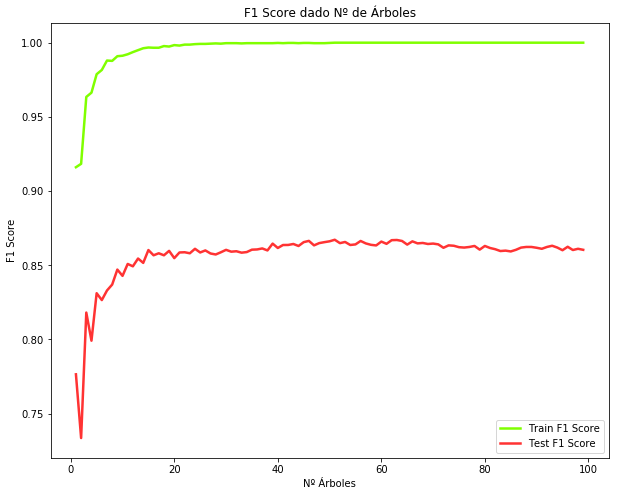

             precision    recall  f1-score   support

          0       0.91      0.88      0.89      1800
          1       0.93      0.95      0.94      3072

avg / total       0.92      0.92      0.92      4872

             precision    recall  f1-score   support

          0       0.72      0.70      0.71       584
          1       0.84      0.85      0.84      1041

avg / total       0.80      0.80      0.80      1625



In [239]:
scoreTrain = []
scoreTest = []
for ne in range(1,100):
    model = RandomForestClassifier(n_estimators=ne, random_state=18, max_depth=20, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, md, sTrain))
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,100)), np.array(scoreTrain), lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(np.array(range(1,100)), np.array(scoreTest), lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()
model = RandomForestClassifier(n_estimators=100, random_state=18, max_depth=10, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

RF 99 1 0.773552
RF 99 2 0.802535
RF 99 3 0.818477
RF 99 4 0.817678
RF 99 5 0.837317
RF 99 6 0.848683
RF 99 7 0.862101
RF 99 8 0.887453
RF 99 9 0.911990
RF 99 10 0.932266
RF 99 11 0.949332
RF 99 12 0.967763
RF 99 13 0.978482
RF 99 14 0.987698
RF 99 15 0.991875
RF 99 16 0.994642
RF 99 17 0.996910
RF 99 18 0.996908
RF 99 19 0.997233
RF 99 20 0.997722
RF 99 21 0.997557
RF 99 22 0.997721
RF 99 23 0.997558
RF 99 24 0.997721
RF 99 25 0.997721
RF 99 26 0.997721
RF 99 27 0.997721
RF 99 28 0.997721
RF 99 29 0.997721
RF 99 30 0.997721
RF 99 31 0.997721
RF 99 32 0.997721
RF 99 33 0.997721
RF 99 34 0.997721
RF 99 35 0.997721
RF 99 36 0.997721
RF 99 37 0.997721
RF 99 38 0.997721
RF 99 39 0.997721
RF 99 40 0.997721
RF 99 41 0.997721
RF 99 42 0.997721
RF 99 43 0.997721
RF 99 44 0.997721
RF 99 45 0.997721
RF 99 46 0.997721
RF 99 47 0.997721
RF 99 48 0.997721
RF 99 49 0.997721
RF 99 50 0.997721
RF 99 51 0.997721
RF 99 52 0.997721
RF 99 53 0.997721
RF 99 54 0.997721
RF 99 55 0.997721
RF 99 56 0.997721
R

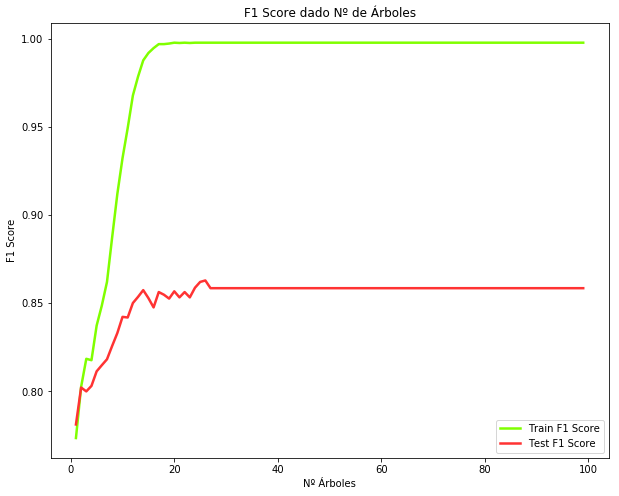

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1800
          1       1.00      1.00      1.00      3072

avg / total       1.00      1.00      1.00      4872

             precision    recall  f1-score   support

          0       0.75      0.75      0.75       584
          1       0.86      0.86      0.86      1041

avg / total       0.82      0.82      0.82      1625



In [240]:
scoreTrain = []
scoreTest = []
for md in range(1,100):
    model = RandomForestClassifier(n_estimators=18, random_state=18, max_depth=md, n_jobs=-1)
    model.fit(X_train, y_train)
    sTrain = f1_score(y_train, model.predict(X_train))
    sTest = f1_score(y_test, model.predict(X_test))
    scoreTrain.append(sTrain)
    scoreTest.append(sTest)
    print("RF %d %d %f" % (ne, md, sTrain))
plt.figure(figsize=(10, 8))
plt.xlabel("Nº Árboles")
plt.ylabel("F1 Score")
plt.title("F1 Score dado Nº de Árboles")
plt.plot(np.array(range(1,100)), np.array(scoreTrain), lw=2.5, color=(0.5,1,0), label='Train F1 Score')
plt.plot(np.array(range(1,100)), np.array(scoreTest), lw=2.5, color=(1,0.2,0.2), label='Test F1 Score')
plt.legend()
plt.show()
model = RandomForestClassifier(n_estimators=18, random_state=18, max_depth=100, n_jobs=-1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

In [251]:
model = RandomForestClassifier(n_estimators=100, random_state=18, n_jobs=-1, bootstrap=False)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1800
          1       1.00      1.00      1.00      3072

avg / total       1.00      1.00      1.00      4872

             precision    recall  f1-score   support

          0       0.74      0.74      0.74       584
          1       0.85      0.86      0.86      1041

avg / total       0.81      0.81      0.81      1625



In [258]:
model = RandomForestClassifier(n_estimators=100, random_state=18, n_jobs=-1, max_features=1)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1800
          1       1.00      1.00      1.00      3072

avg / total       1.00      1.00      1.00      4872

             precision    recall  f1-score   support

          0       0.76      0.73      0.74       584
          1       0.85      0.87      0.86      1041

avg / total       0.82      0.82      0.82      1625



In [265]:
model = RandomForestClassifier(n_estimators=100, random_state=18, n_jobs=-1, min_samples_leaf=5)
model.fit(X_train, y_train)
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.87      0.90      1800
          1       0.93      0.96      0.94      3072

avg / total       0.93      0.93      0.93      4872

             precision    recall  f1-score   support

          0       0.72      0.71      0.71       584
          1       0.84      0.85      0.84      1041

avg / total       0.80      0.80      0.80      1625



#### Respuesta

En primera instancia, comparando los gráficos, se observa que el permitir mayor profundidad hace que el algoritmo converja de forma mas estable. De esta forma un resultado obtenido con un RandomForest de mayor profundidad da mas seguridad en sus resultados a futuro.

Por otro lado, el aumento en la cantidad de estimadores provocó que mejorara el algoritmo, de igual forma que aumentar la profundidad, sin embargo este crecimiento ocurre de forma mas inestable, dando a entender que la profundidad es un elemento vital en el comportamento del algoritmo.

El último experimento realizado, donde se pusieron ambos parámetros en 100, el máximo de los experimentos de aumento, muestra que el f1Score obtenido es exactamente igual a que si solo se aumenta la profundidad.

Dado todo lo anterior, en orden de importancia, el parámetro de profundidad tiene mas influencia que el parámetro de numero de estimadores ya que permite alcanzar el máximo potencial de la máquina.

Se realizó el experimento de eliminar bootstrasp y el f1Score empeoró, denotando lo diferenciador que es esta característica en el algorítmo.

Se observa que el parámetro max_features no influye. Sin embargo esto se puede deber a que la cantidad de atributos que describe el vino son pocos, tomando ya cada árbol un atributo.

El número mínimo de elemntos en las hojas tambien influye. Al aumentarlo mas de 3 se observa que empeora el f1Score. Esto se puede deber a que el algoritmo se va obligado a incluir elementos de la otra clase en la respuesta.

Respecto a la técnicas de boost, se mostró que los parámetros de máxima profundidad, la cantidad de arboles, tiene también una gran influencia en el conjunto de entrenamiento, pero no tanto así cuando se usa el conjunto de pruebas, por lo tanto, se concl